In [2]:
!pip install yfinance

In [5]:
import yfinance as yf
Apple = yf.Ticker('AAPL')
Apple.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscriptio

In [13]:
hist = Apple.history(period="3y")
hist['Date']=hist.index
hist=hist.reset_index(drop=True)
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,79.403213,79.584844,77.685060,77.741516,125522000,0.0,0.0,2020-05-26 00:00:00-04:00
1,77.596708,78.227510,76.848080,78.080238,112945200,0.0,0.0,2020-05-27 00:00:00-04:00
2,77.751339,79.388497,77.471530,78.114609,133560800,0.0,0.0,2020-05-28 00:00:00-04:00
3,78.360045,78.826399,77.677693,78.038506,153532400,0.0,0.0,2020-05-29 00:00:00-04:00
4,77.991867,79.120940,77.859321,78.998215,80791200,0.0,0.0,2020-06-01 00:00:00-04:00
...,...,...,...,...,...,...,...,...
751,173.000000,175.240005,172.580002,175.050003,65496700,0.0,0.0,2023-05-18 00:00:00-04:00
752,176.389999,176.389999,174.940002,175.160004,55772400,0.0,0.0,2023-05-19 00:00:00-04:00
753,173.979996,174.710007,173.449997,174.199997,43570900,0.0,0.0,2023-05-22 00:00:00-04:00
754,173.130005,173.380005,171.279999,171.559998,50747300,0.0,0.0,2023-05-23 00:00:00-04:00


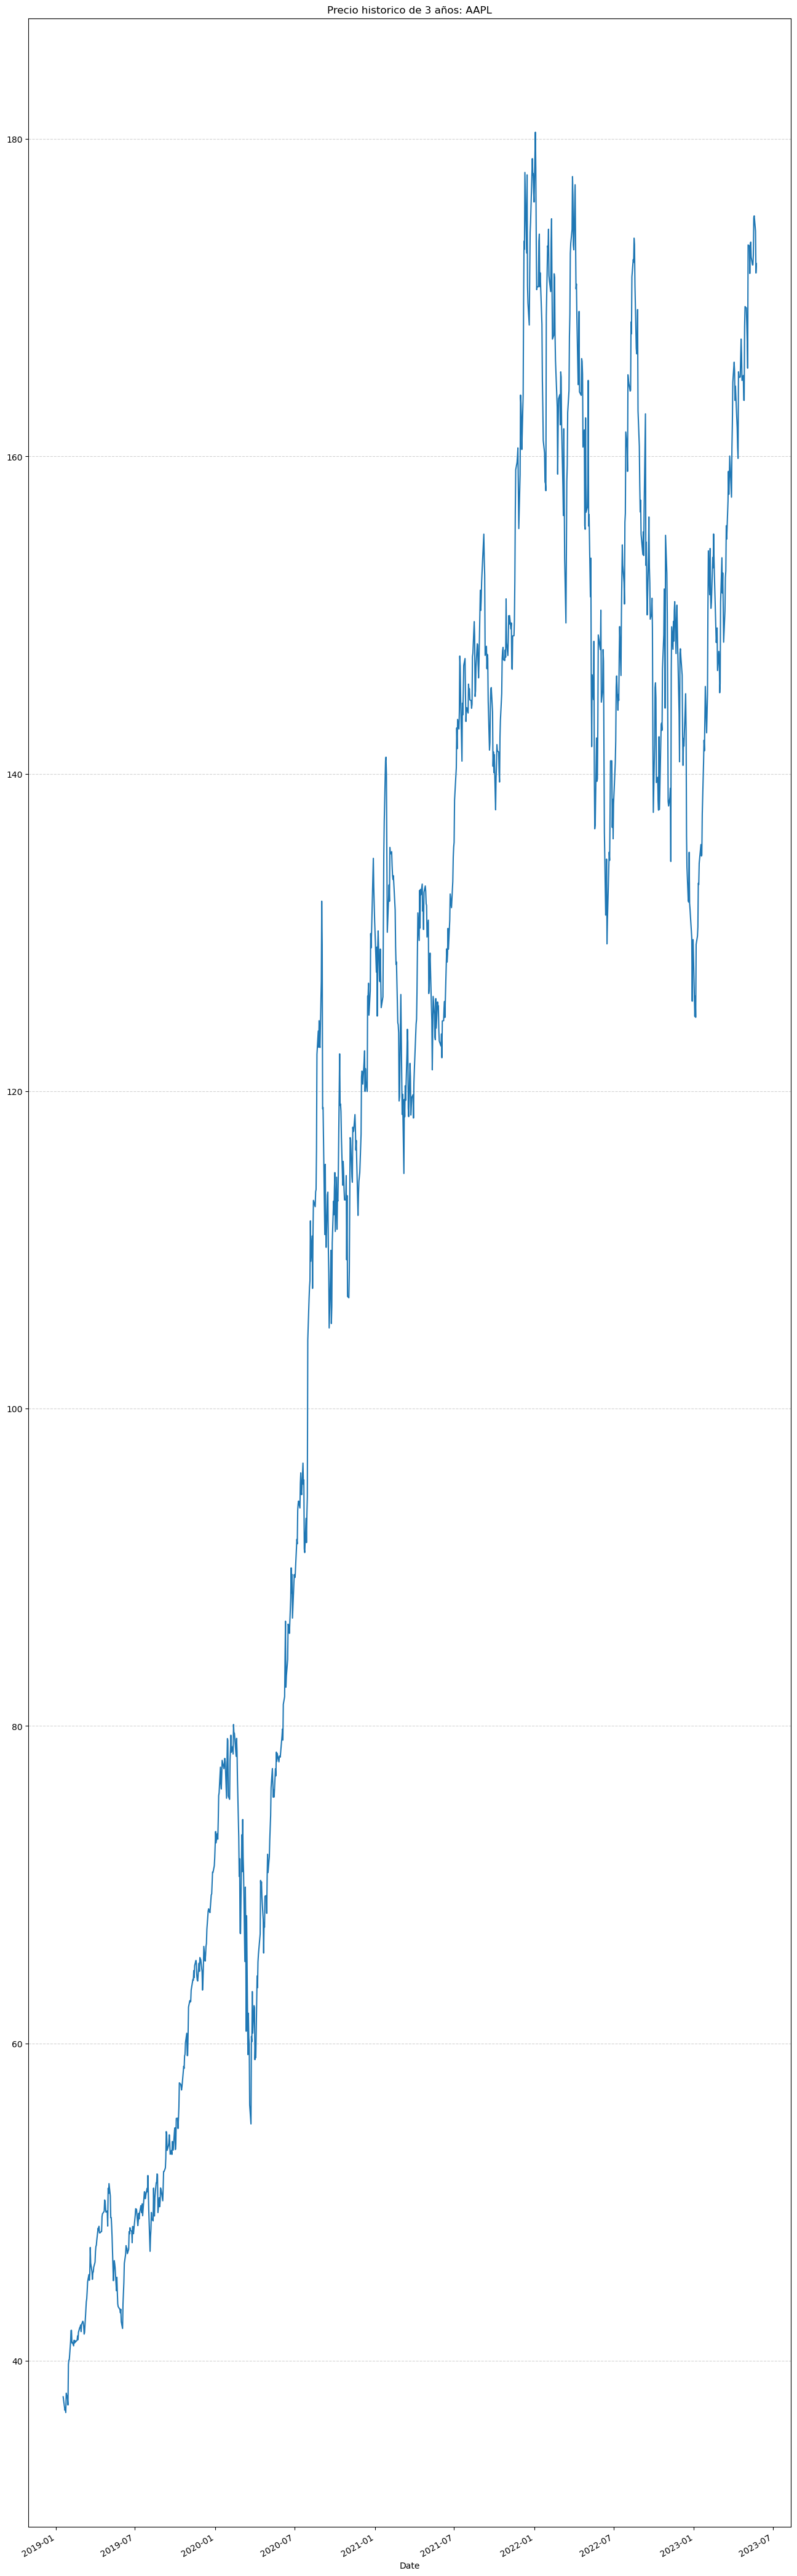

In [20]:
tickers = ['AAPL']
import matplotlib.pyplot as plt
for i,ticker in enumerate(tickers):
  current_ticker = yf.Ticker(ticker)
  plt.subplot(len(tickers),1,i+1)
  current_ticker.history(period='1095d')['Close'].plot(figsize=(16,60), title='Precio historico de 3 años: '+ticker)
plt.grid(color='lightgray',linestyle="--",axis="y")



[*********************100%***********************]  1 of 1 completed


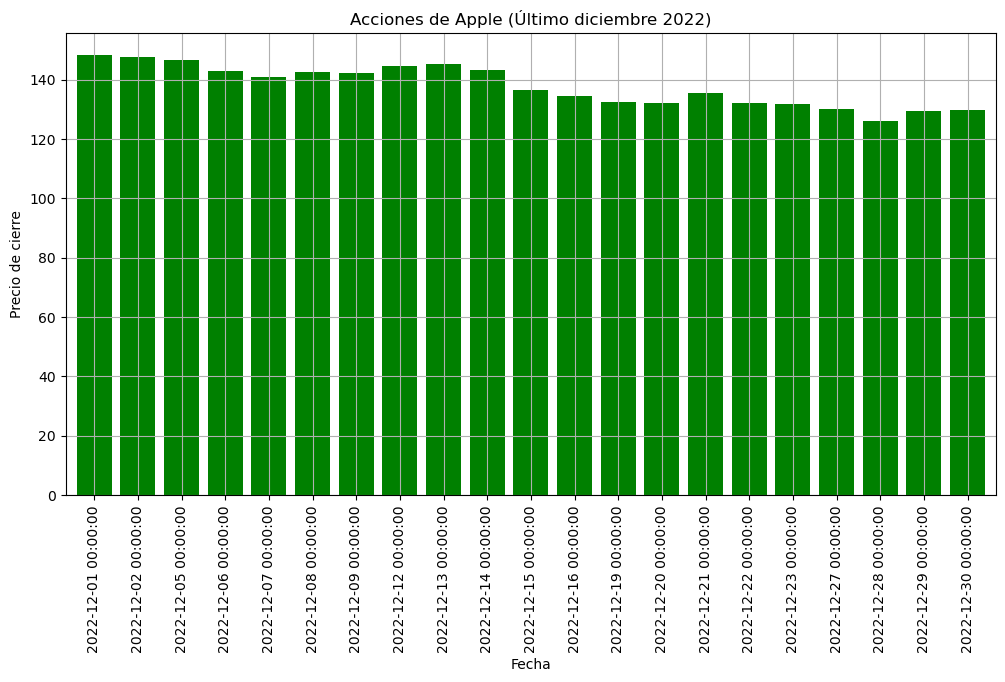

In [31]:
apple = yf.download('AAPL', start='2022-12-01', end='2023-01-01')
apple = apple['Close']
plt.figure(figsize=(12, 6))
apple.plot(kind='bar', color='green', width=0.8)
plt.title('Acciones de Apple (Último diciembre 2022)')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.grid(True)


In [34]:
symbol = "AAPL"
start_date = "2013-01-01"
end_date = "2023-01-01"

data = yf.download(symbol, start=start_date, end=end_date)

import pandas as pd

[*********************100%***********************]  1 of 1 completed


In [63]:
!pip install sqlalchemy 
!pip install redshift_connector
from sqlalchemy import create_engine
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.1/112.1 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 2.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 16.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 1.5 MB/s eta 0:00:00ta 0:00:01


In [72]:
!pip install pg8000
connection = f"postgresql+pg8000://{'fabianteseyra_coderhouse'}:{'ftP4h6VHz8'}@{'data-engineer-cluster.cyhh5bfevlmn.us-east-1.redshift.amazonaws.com'}:{'5439'}/{'data-engineer-database'}"

In [95]:
data["Year"] = data.index.year 
price_avg_high = data.groupby("Year")["High"].mean() 
price_avg_low= data.groupby("Year")["Low"].mean()
price_max_open= data.groupby("Year")["Open"].max()
price_min_close= data.groupby("Year")["Close"].min()
Q_avg_Volume= data.groupby("Year")["Volume"].mean()

Apple_acciones = pd.DataFrame({"Promedio High": price_avg_high_yearly, "Promedio Low": price_avg_low_yearly, "Maximo Open": price_max_open, "Minimo Close":price_min_close, "Promedio Volume":Q_avg_Volume})

print(Apple_acciones)

      Promedio High  Promedio Low  Maximo Open  Minimo Close  Promedio Volume
Year                                                                         
2013      17.058533     16.723111    20.451786     13.947500     4.064348e+08
2014      23.253166     22.868885    29.817499     17.849285     2.526109e+08
2015      30.311131     29.715774    33.615002     25.780001     2.073976e+08
2016      26.356796     25.922569    29.545000     22.584999     1.536901e+08
2017      37.851514     37.371912    43.777500     29.004999     1.085383e+08
2018      47.748526     46.795877    57.695000     36.707500     1.360803e+08
2019      52.457927     51.567907    72.779999     35.547501     1.121228e+08
2020      96.661769     93.912796   138.050003     56.092499     1.575646e+08
2021     142.347818    139.474087   181.119995    116.360001     9.052463e+07
2022     156.907809    152.691315   182.630005    126.040001     8.791038e+07


In [82]:
!pip install psycopg2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.1 MB/s eta 0:00:00a 0:00:01


In [99]:
import psycopg2
conn = psycopg2.connect(
    host='XXXXX', 
    port = 'XXXXX',
    database='XXXXX',
    user='XXXXX', 
    password='XXXXX'
)

cursor = conn.cursor()
cursor.execute('''create table if not exists apple_acciones( 
        Year INT,
        "Promedio High" FLOAT,
        "Promedio Low" FLOAT,
        "Maximo Open" FLOAT,
        "Minimo Close"  FLOAT,
        "Promedio Volume" FLOAT)
        ''')
conn.commit()
    

cursor.close()
conn.close()
